In [1]:
#the python version of the PA 2 template

import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def create_blank(height, width, img_type, channels):
    """
    In this assignment, since operations are applied on 2D gray image,
    we can saftly ignore the "channels" and create a 2D matrix for simplicity
    """
    """Create new image(numpy array) """
    # image = np.zeros((height, width, channels), img_type)
    image = np.zeros((height, width), img_type)

    return image

"""
Notes on np.zeros()

When np.zeros is called with 3 parameters in shape instead of the normal 2,
when we access using [i, j], we will always get a return value in array [ ].

for example, (2, 2, 1) makes an array that looks like
array([[[0],
        [0]],

        [[0],
        [0]]], dtype=uint8)

The 0th spot is [0], not just 0.
To set this value we can do array[0,0] = 2.
array[0,0] returns [2]
array[0,0][0] returns 2

for array of size (2, 2, 3) we get:
array([[[1, 0, 0],
    [2, 0, 0]],

   [[2, 0, 0],
    [3, 0, 0]]], dtype=uint8)
This is the same as the first assignment. to get the values of x, y, z
of one pixel, just do pixel = array[i,j] and that returns [x, y, z].

Be aware of the number of channels of your matrices!

"""

'\nNotes on np.zeros()\n\nWhen np.zeros is called with 3 parameters in shape instead of the normal 2,\nwhen we access using [i, j], we will always get a return value in array [ ].\n\nfor example, (2, 2, 1) makes an array that looks like\narray([[[0],\n        [0]],\n\n        [[0],\n        [0]]], dtype=uint8)\n\nThe 0th spot is [0], not just 0.\nTo set this value we can do array[0,0] = 2.\narray[0,0] returns [2]\narray[0,0][0] returns 2\n\nfor array of size (2, 2, 3) we get:\narray([[[1, 0, 0],\n    [2, 0, 0]],\n\n   [[2, 0, 0],\n    [3, 0, 0]]], dtype=uint8)\nThis is the same as the first assignment. to get the values of x, y, z\nof one pixel, just do pixel = array[i,j] and that returns [x, y, z].\n\nBe aware of the number of channels of your matrices!\n\n'

# Task 1

[[0.0025 0.0125 0.02   0.0125 0.0025]
 [0.0125 0.0625 0.1    0.0625 0.0125]
 [0.02   0.1    0.16   0.1    0.02  ]
 [0.0125 0.0625 0.1    0.0625 0.0125]
 [0.0025 0.0125 0.02   0.0125 0.0025]]
0.0625


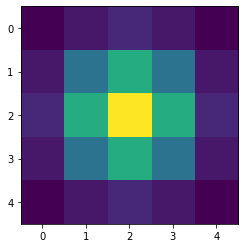

In [2]:
def CreateGaussianFilter():
    #This is your empty kernel
    #Every entry is a float value
    rows = 5
    cols = 5
    I = create_blank(rows, cols, np.float32, 1)

    #This is 1D Gaussian kernel values
    g = [ 0.05, 0.25, 0.4, 0.25, 0.05 ]

    for i in range(0, rows):
        for j in range(0, cols):
            #fill in kernel values
            I[i, j] = g[i]*g[j]         

    return I

GaussianFilter = CreateGaussianFilter()
print(GaussianFilter)
print(GaussianFilter[1,1])
plt.imshow(GaussianFilter)

# Task 2

In [83]:
#Matrix input and matrix filter
def ApplyFilter(input, filter, img_type=np.uint8):
    #This is your empty output Mat
    output = create_blank(input.shape[0], input.shape[1], img_type, 1)
    
    kernel_range = filter.shape[0]
    kernel_range = kernel_range // 2
    
    #create an intermediate image with mirror padding
    img = cv.copyMakeBorder(input,kernel_range,kernel_range,kernel_range,kernel_range,cv.BORDER_REFLECT)
    
    kernel = np.fliplr(filter)
    kernel = np.flipud(kernel)
    
    rows = img.shape[0]
    cols = img.shape[1]
    
    for i in range(0, rows):
        for j in range(0, cols):
            total = 0
            #Perform convolution for this pixel
            for x in range(max(0,i - kernel_range),min(rows-1,i + kernel_range) + 1):
                for y in range(max(0,j - kernel_range),min(cols-1, j + kernel_range) + 1):
                    kernel_x = x + kernel_range - i
                    kernel_y = y + kernel_range - j
                    kernel_v = kernel[kernel_x,kernel_y]
                    total += float(img[x,y]) * kernel_v
            #Assign the output value for pixel
            img[i, j] = total
    output = img[kernel_range:-kernel_range,kernel_range:-kernel_range]
    
    return output

# Task 3

In [84]:
def Reduce(input, img_type=np.uint8):
    #This is your empty output image
    output = create_blank(int(input.shape[0] / 2), int(input.shape[1] / 2), img_type, 1)

    rows = output.shape[0]
    cols = output.shape[1]
    
    #Calculate each pixel of output image
    for i in range(0, rows):
        for j in range(0, cols):
            output[i, j] = (float(input[2*i,2*j]) + 
                            float(input[2*i, 2*j+1]) + 
                            float(input[2*i+1,2*j]) +
                            float(input[2*i+1, 2*j+1]))/4.0
                           
    return output

In [85]:
barbara_g0 = cv.imread( "./images for PA2/barbara_g0.png" , cv.IMREAD_GRAYSCALE ) 
boat_g0 = cv.imread( "./images for PA2/boat_g0.png" , cv.IMREAD_GRAYSCALE ) 
flinstones_g0 = cv.imread( "./images for PA2/flinstones_g0.png" , cv.IMREAD_GRAYSCALE ) 

# Task 4

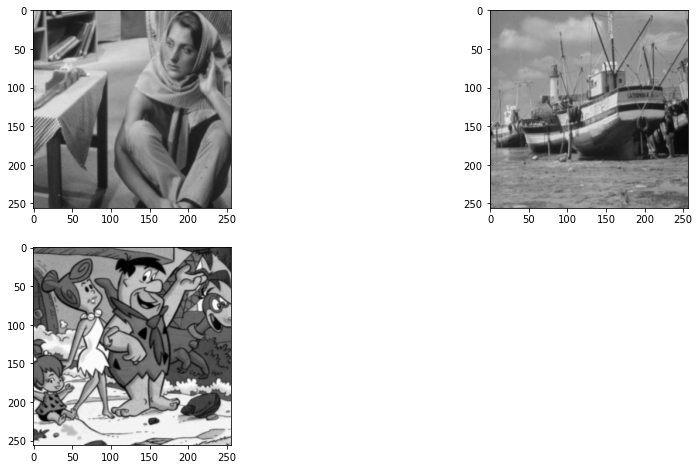

In [86]:
fig = plt.figure(figsize = (15,8))

barbara_g1 = ApplyFilter(barbara_g0,GaussianFilter)
barbara_g1 = Reduce(barbara_g1)

boat_g1 = ApplyFilter(boat_g0,GaussianFilter)
boat_g1 = Reduce(boat_g1)

flinstones_g1 = ApplyFilter(flinstones_g0,GaussianFilter)
flinstones_g1 = Reduce(flinstones_g1)

fig.add_subplot(2,2,1)
plt.imshow(barbara_g1,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_g1,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_g1,cmap = "gray", vmin=0,vmax=255)

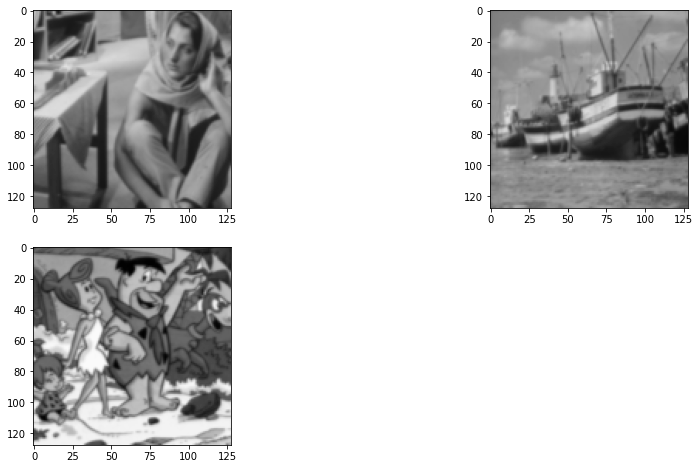

In [87]:
fig = plt.figure(figsize = (15,8))

barbara_g2 = ApplyFilter(barbara_g1,GaussianFilter)
barbara_g2 = Reduce(barbara_g2)

boat_g2 = ApplyFilter(boat_g1,GaussianFilter)
boat_g2 = Reduce(boat_g2)

flinstones_g2 = ApplyFilter(flinstones_g1,GaussianFilter)
flinstones_g2 = Reduce(flinstones_g2)

fig.add_subplot(2,2,1)
plt.imshow(barbara_g2,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_g2,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_g2,cmap = "gray", vmin=0,vmax=255)


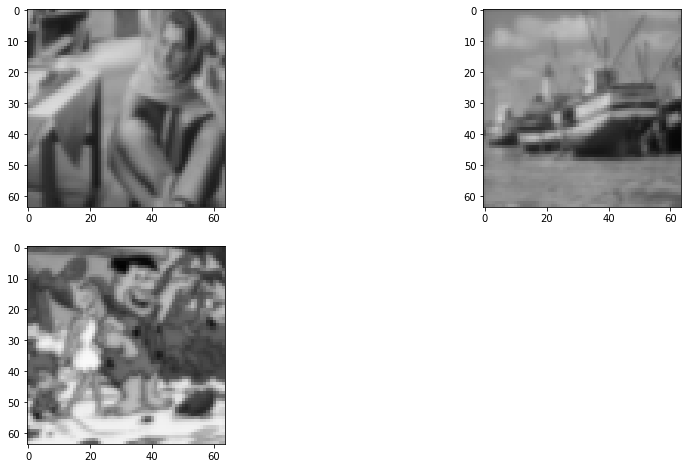

In [88]:
fig = plt.figure(figsize = (15,8))

barbara_g3 = ApplyFilter(barbara_g2,GaussianFilter)
barbara_g3 = Reduce(barbara_g3)

boat_g3 = ApplyFilter(boat_g2,GaussianFilter)
boat_g3 = Reduce(boat_g3)

flinstones_g3 = ApplyFilter(flinstones_g2,GaussianFilter)
flinstones_g3 = Reduce(flinstones_g3)

fig.add_subplot(2,2,1)
plt.imshow(barbara_g3,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_g3,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_g3,cmap = "gray", vmin=0,vmax=255)


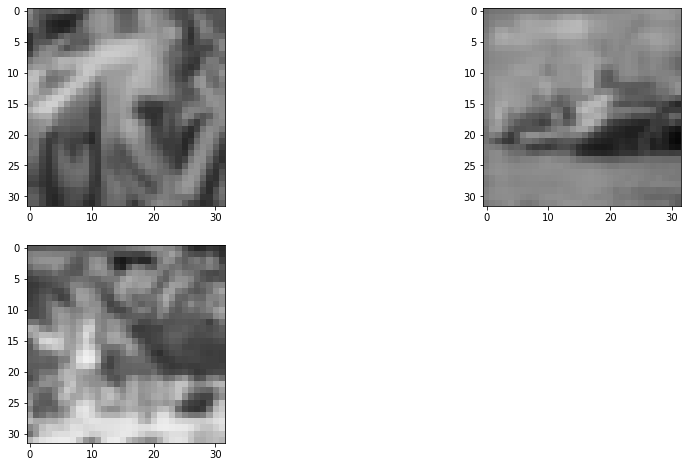

In [89]:
fig = plt.figure(figsize = (15,8))

barbara_g4 = ApplyFilter(barbara_g3,GaussianFilter)
barbara_g4 = Reduce(barbara_g4)

boat_g4 = ApplyFilter(boat_g3,GaussianFilter)
boat_g4 = Reduce(boat_g4)

flinstones_g4 = ApplyFilter(flinstones_g3,GaussianFilter)
flinstones_g4 = Reduce(flinstones_g4)

fig.add_subplot(2,2,1)
plt.imshow(barbara_g4,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_g4,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_g4,cmap = "gray", vmin=0,vmax=255)

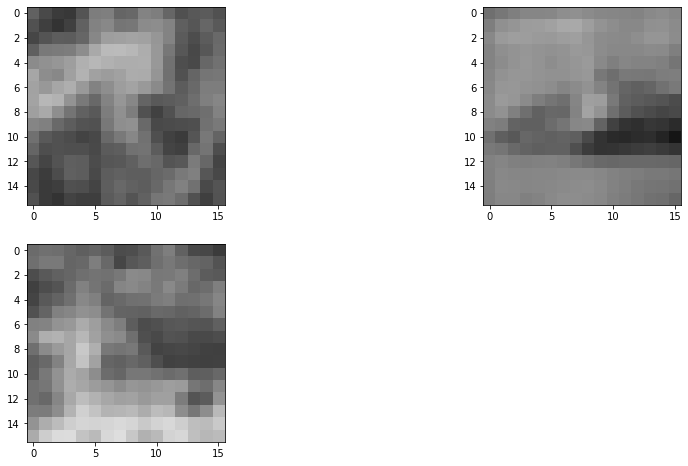

In [90]:
fig = plt.figure(figsize = (15,8))

barbara_g5 = ApplyFilter(barbara_g4,GaussianFilter)
barbara_g5 = Reduce(barbara_g5)

boat_g5 = ApplyFilter(boat_g4,GaussianFilter)
boat_g5 = Reduce(boat_g5)

flinstones_g5 = ApplyFilter(flinstones_g4,GaussianFilter)
flinstones_g5 = Reduce(flinstones_g5)

fig.add_subplot(2,2,1)
plt.imshow(barbara_g5,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_g5,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_g5,cmap = "gray", vmin=0,vmax=255)

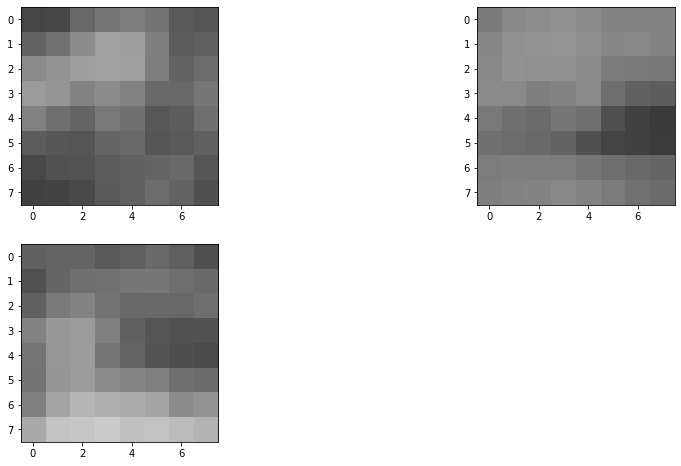

In [91]:
fig = plt.figure(figsize = (15,8))

barbara_g6 = ApplyFilter(barbara_g5,GaussianFilter)
barbara_g6 = Reduce(barbara_g6)

boat_g6 = ApplyFilter(boat_g5,GaussianFilter)
boat_g6 = Reduce(boat_g6)

flinstones_g6 = ApplyFilter(flinstones_g5,GaussianFilter)
flinstones_g6 = Reduce(flinstones_g6)

fig.add_subplot(2,2,1)
plt.imshow(barbara_g6,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_g6,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_g6,cmap = "gray", vmin=0,vmax=255)

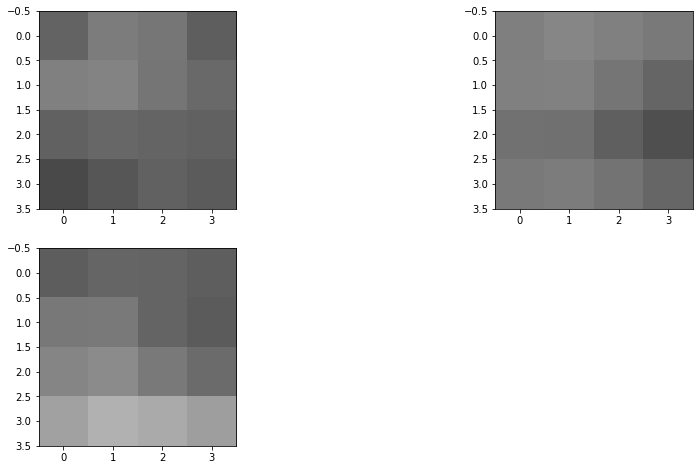

In [92]:
fig = plt.figure(figsize = (15,8))

barbara_g7 = ApplyFilter(barbara_g6,GaussianFilter)
barbara_g7 = Reduce(barbara_g7)

boat_g7 = ApplyFilter(boat_g6,GaussianFilter)
boat_g7 = Reduce(boat_g7)

flinstones_g7 = ApplyFilter(flinstones_g6,GaussianFilter)
flinstones_g7 = Reduce(flinstones_g7)

fig.add_subplot(2,2,1)
plt.imshow(barbara_g7,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_g7,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_g7,cmap = "gray", vmin=0,vmax=255)

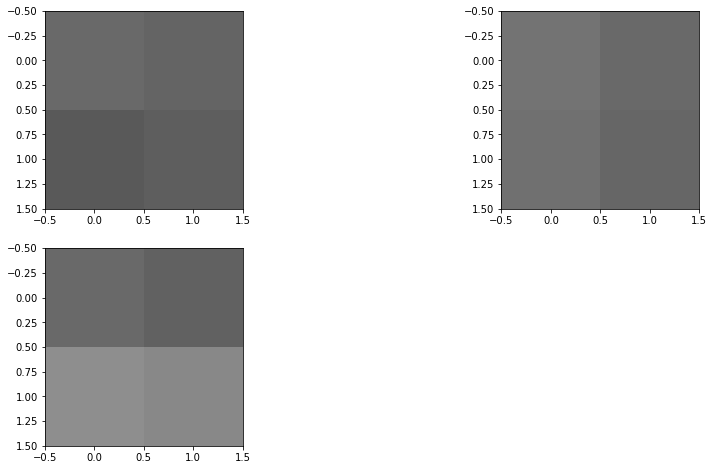

In [93]:
fig = plt.figure(figsize = (15,8))

barbara_g8 = ApplyFilter(barbara_g7,GaussianFilter)
barbara_g8 = Reduce(barbara_g8)

boat_g8 = ApplyFilter(boat_g7,GaussianFilter)
boat_g8 = Reduce(boat_g8)

flinstones_g8 = ApplyFilter(flinstones_g7,GaussianFilter)
flinstones_g8 = Reduce(flinstones_g8)

fig.add_subplot(2,2,1)
plt.imshow(barbara_g8,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_g8,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_g8,cmap = "gray", vmin=0,vmax=255)

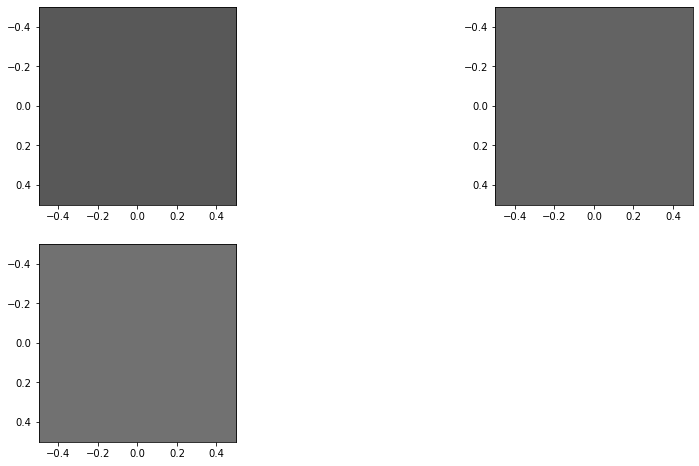

In [94]:
fig = plt.figure(figsize = (15,8))

barbara_g9 = ApplyFilter(barbara_g8,GaussianFilter)
barbara_g9 = Reduce(barbara_g9)

boat_g9 = ApplyFilter(boat_g8,GaussianFilter)
boat_g9 = Reduce(boat_g9)

flinstones_g9 = ApplyFilter(flinstones_g8,GaussianFilter)
flinstones_g9 = Reduce(flinstones_g9)

fig.add_subplot(2,2,1)
plt.imshow(barbara_g9,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_g9,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_g9,cmap = "gray", vmin=0,vmax=255)

In [95]:
barbara_g1 = cv.resize(barbara_g1, (512,512))
barbara_g2 = cv.resize(barbara_g2, (512,512))
barbara_g3 = cv.resize(barbara_g3, (512,512))
barbara_g4 = cv.resize(barbara_g4, (512,512))
barbara_g5 = cv.resize(barbara_g5, (512,512))
barbara_g6 = cv.resize(barbara_g6, (512,512))
barbara_g7 = cv.resize(barbara_g7, (512,512))
barbara_g8 = cv.resize(barbara_g8, (512,512))
barbara_g9 = cv.resize(barbara_g9, (512,512))

boat_g1 = cv.resize(boat_g1, (512,512))
boat_g2 = cv.resize(boat_g2, (512,512))
boat_g3 = cv.resize(boat_g3, (512,512))
boat_g4 = cv.resize(boat_g4, (512,512))
boat_g5 = cv.resize(boat_g5, (512,512))
boat_g6 = cv.resize(boat_g6, (512,512))
boat_g7 = cv.resize(boat_g7, (512,512))
boat_g8 = cv.resize(boat_g8, (512,512))
boat_g9 = cv.resize(boat_g9, (512,512))

flinstones_g1 = cv.resize(flinstones_g1, (512,512))
flinstones_g2 = cv.resize(flinstones_g2, (512,512))
flinstones_g3 = cv.resize(flinstones_g3, (512,512))
flinstones_g4 = cv.resize(flinstones_g4, (512,512))
flinstones_g5 = cv.resize(flinstones_g5, (512,512))
flinstones_g6 = cv.resize(flinstones_g6, (512,512))
flinstones_g7 = cv.resize(flinstones_g7, (512,512))
flinstones_g8 = cv.resize(flinstones_g8, (512,512))
flinstones_g9 = cv.resize(flinstones_g9, (512,512))


In [96]:
cv.imwrite("barbara_g1.png",barbara_g1)
cv.imwrite("barbara_g2.png",barbara_g2)
cv.imwrite("barbara_g3.png",barbara_g3)
cv.imwrite("barbara_g4.png",barbara_g4)
cv.imwrite("barbara_g5.png",barbara_g5)
cv.imwrite("barbara_g6.png",barbara_g6)
cv.imwrite("barbara_g7.png",barbara_g7)
cv.imwrite("barbara_g8.png",barbara_g8)
cv.imwrite("barbara_g9.png",barbara_g9)

cv.imwrite("boat_g1.png",boat_g1)
cv.imwrite("boat_g2.png",boat_g2)
cv.imwrite("boat_g3.png",boat_g3)
cv.imwrite("boat_g4.png",boat_g4)
cv.imwrite("boat_g5.png",boat_g5)
cv.imwrite("boat_g6.png",boat_g6)
cv.imwrite("boat_g7.png",boat_g7)
cv.imwrite("boat_g8.png",boat_g8)
cv.imwrite("boat_g9.png",boat_g9)

cv.imwrite("flinstones_g1.png",flinstones_g1)
cv.imwrite("flinstones_g2.png",flinstones_g2)
cv.imwrite("flinstones_g3.png",flinstones_g3)
cv.imwrite("flinstones_g4.png",flinstones_g4)
cv.imwrite("flinstones_g5.png",flinstones_g5)
cv.imwrite("flinstones_g6.png",flinstones_g6)
cv.imwrite("flinstones_g7.png",flinstones_g7)
cv.imwrite("flinstones_g8.png",flinstones_g8)
cv.imwrite("flinstones_g9.png",flinstones_g9)

True

# Task 5

In [97]:
def Deduct(I, J):
    #Intermediate pixel to keep the differences
    #Each entry is int

    intermediate = create_blank(I.shape[0], I.shape[1], np.int32, 1);
    minVal = 256
    maxVal = -256

    rows = intermediate.shape[0]
    cols = intermediate.shape[1]

    for i in range(0, rows):
        for j in range(0, cols):
            # Calculate the intermediate pixel values
            difference = int(I[i,j]) - int(J[i,j])
            if difference > maxVal:
                maxVal = difference
            if difference < minVal:
                minVal = difference
            intermediate[i,j] = difference
            if difference == 0:
                intermediate[i,j] = 0
            
    dynamicRange = float(maxVal - minVal)

    #The output image of type unsigned char for each pixel

    result = create_blank(I.shape[0], I.shape[1], np.uint8, 1)

    for i in range(0, result.shape[0]):
        for j in range(0, result.shape[1]):
            # Calculate the output pixels
            result[i, j] = 255*((intermediate[i,j] - minVal)/dynamicRange)

    return result


# Task 6

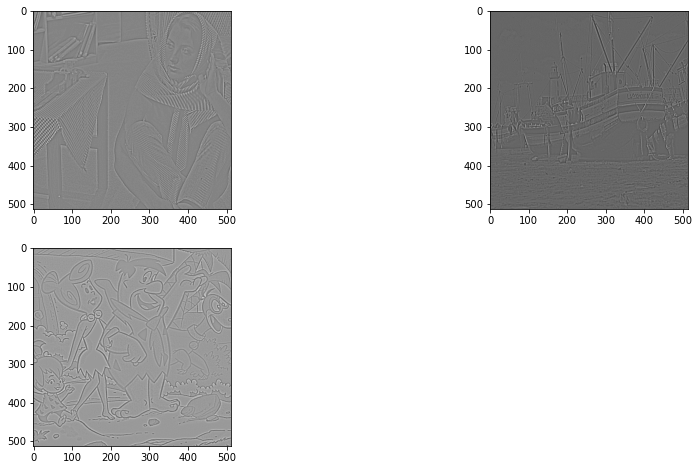

In [98]:
fig = plt.figure(figsize = (15,8))

barbara_L1 = Deduct(barbara_g0,barbara_g1)

boat_L1 = Deduct(boat_g0,boat_g1)

flinstones_L1 = Deduct(flinstones_g0,flinstones_g1)


fig.add_subplot(2,2,1)
plt.imshow(barbara_L1,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_L1,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_L1,cmap = "gray", vmin=0,vmax=255)

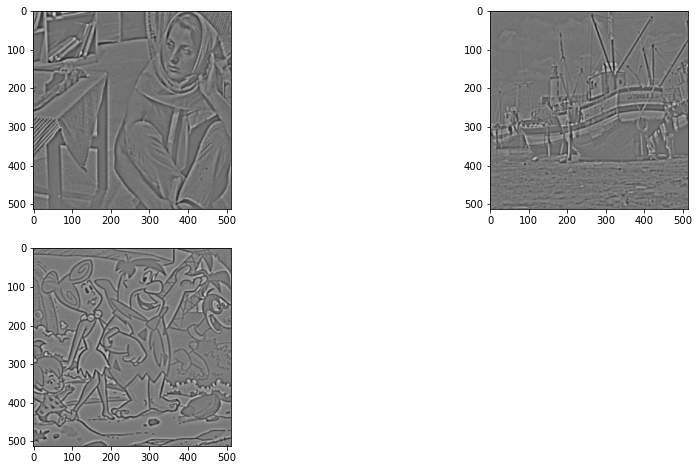

In [99]:
fig = plt.figure(figsize = (15,8))

barbara_L2 = Deduct(barbara_g1,barbara_g2)

boat_L2 = Deduct(boat_g1,boat_g2)

flinstones_L2 = Deduct(flinstones_g1,flinstones_g2)


fig.add_subplot(2,2,1)
plt.imshow(barbara_L2,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_L2,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_L2,cmap = "gray", vmin=0,vmax=255)

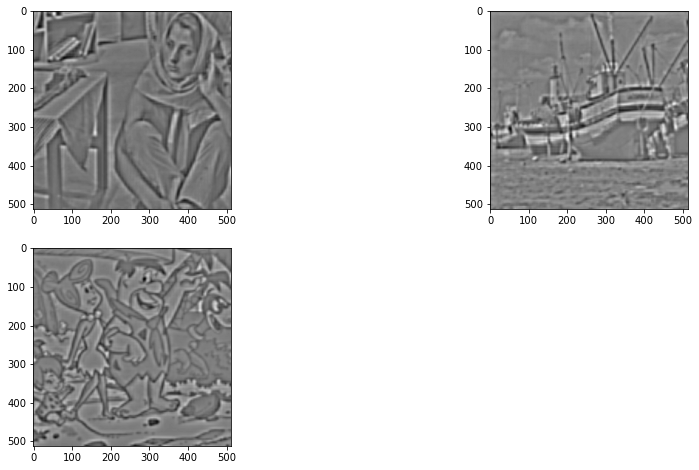

In [100]:
fig = plt.figure(figsize = (15,8))

barbara_L3 = Deduct(barbara_g2,barbara_g3)

boat_L3 = Deduct(boat_g2,boat_g3)

flinstones_L3 = Deduct(flinstones_g2,flinstones_g3)


fig.add_subplot(2,2,1)
plt.imshow(barbara_L3,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_L3,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_L3,cmap = "gray", vmin=0,vmax=255)

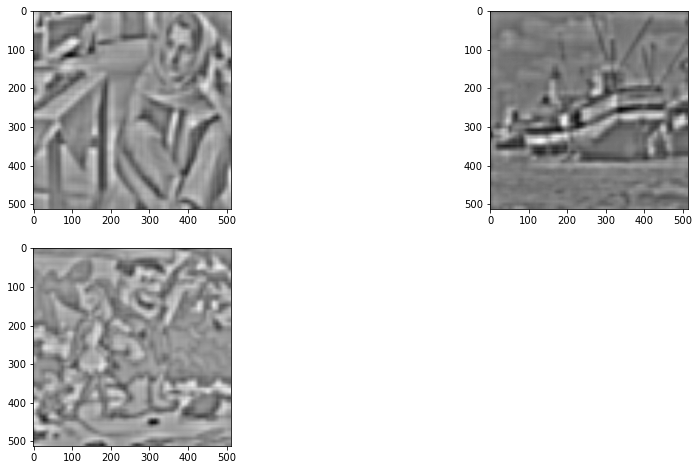

In [101]:
fig = plt.figure(figsize = (15,8))

barbara_L4 = Deduct(barbara_g3,barbara_g4)

boat_L4 = Deduct(boat_g3,boat_g4)

flinstones_L4 = Deduct(flinstones_g3,flinstones_g4)


fig.add_subplot(2,2,1)
plt.imshow(barbara_L4,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_L4,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_L4,cmap = "gray", vmin=0,vmax=255)

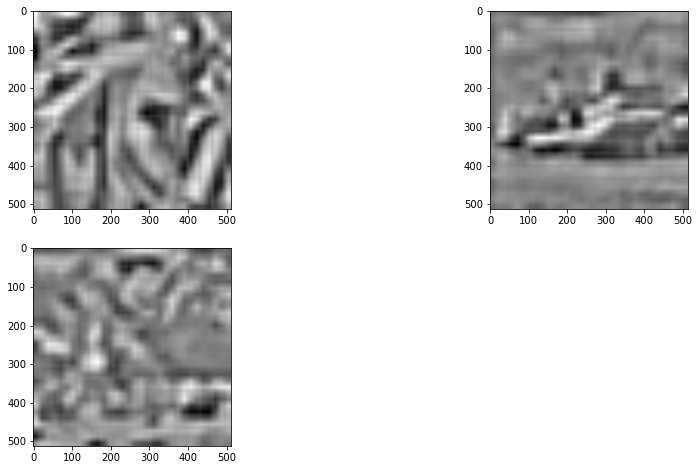

In [102]:
fig = plt.figure(figsize = (15,8))

barbara_L5 = Deduct(barbara_g4,barbara_g5)

boat_L5 = Deduct(boat_g4,boat_g5)

flinstones_L5 = Deduct(flinstones_g4,flinstones_g5)


fig.add_subplot(2,2,1)
plt.imshow(barbara_L5,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_L5,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_L5,cmap = "gray", vmin=0,vmax=255)

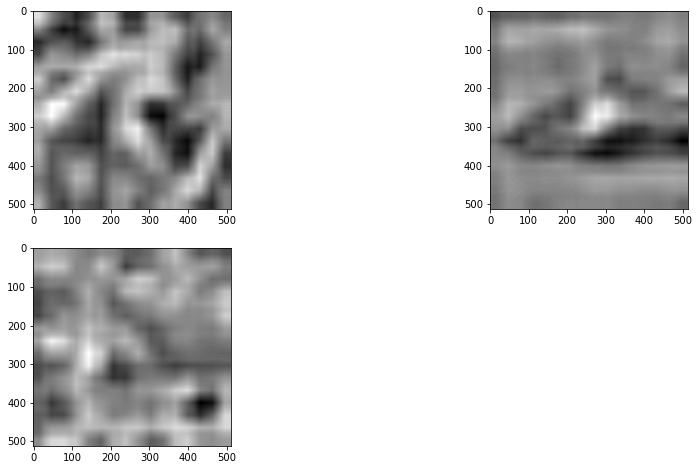

In [103]:
fig = plt.figure(figsize = (15,8))

barbara_L6 = Deduct(barbara_g5,barbara_g6)

boat_L6 = Deduct(boat_g5,boat_g6)

flinstones_L6 = Deduct(flinstones_g5,flinstones_g6)


fig.add_subplot(2,2,1)
plt.imshow(barbara_L6,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_L6,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_L6,cmap = "gray", vmin=0,vmax=255)

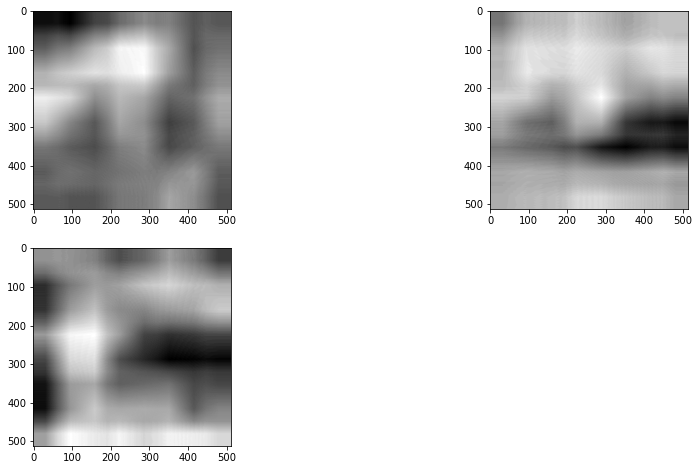

In [104]:
fig = plt.figure(figsize = (15,8))

barbara_L7 = Deduct(barbara_g6,barbara_g7)

boat_L7 = Deduct(boat_g6,boat_g7)

flinstones_L7 = Deduct(flinstones_g6,flinstones_g7)


fig.add_subplot(2,2,1)
plt.imshow(barbara_L7,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_L7,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_L7,cmap = "gray", vmin=0,vmax=255)

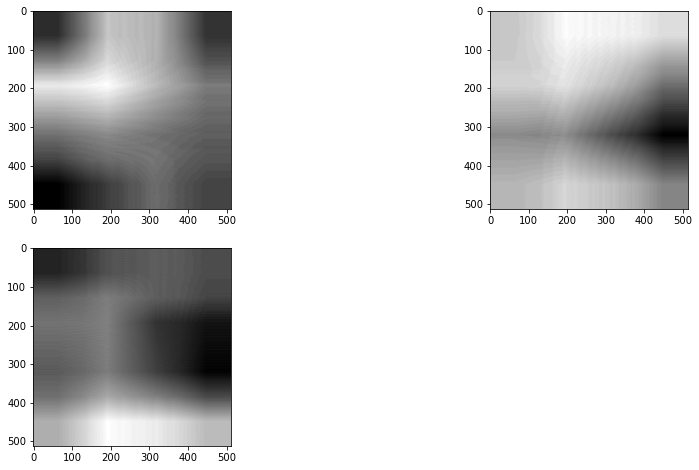

In [105]:
fig = plt.figure(figsize = (15,8))

barbara_L8 = Deduct(barbara_g7,barbara_g8)

boat_L8 = Deduct(boat_g7,boat_g8)

flinstones_L8 = Deduct(flinstones_g7,flinstones_g8)


fig.add_subplot(2,2,1)
plt.imshow(barbara_L8,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_L8,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_L8,cmap = "gray", vmin=0,vmax=255)

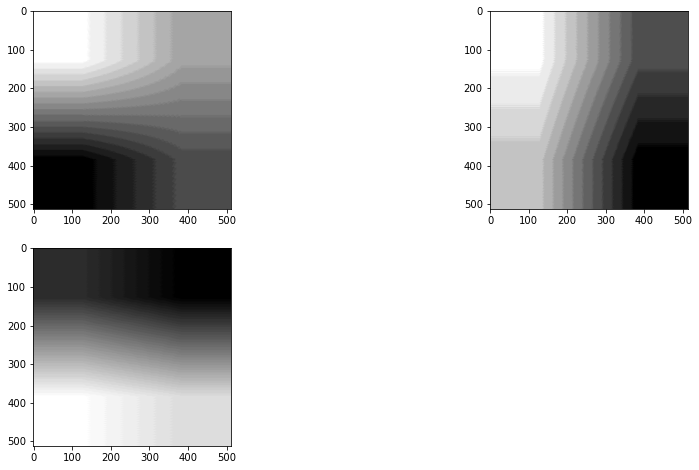

In [106]:
fig = plt.figure(figsize = (15,8))

barbara_L9 = Deduct(barbara_g8,barbara_g9)

boat_L9 = Deduct(boat_g8,boat_g9)

flinstones_L9 = Deduct(flinstones_g8,flinstones_g9)


fig.add_subplot(2,2,1)
plt.imshow(barbara_L9,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,2)
plt.imshow(boat_L9,cmap = "gray", vmin=0,vmax=255)

fig.add_subplot(2,2,3)
plt.imshow(flinstones_L9,cmap = "gray", vmin=0,vmax=255)

In [107]:
cv.imwrite("barbara_L1.png",barbara_L1)
cv.imwrite("barbara_L2.png",barbara_L2)
cv.imwrite("barbara_L3.png",barbara_L3)
cv.imwrite("barbara_L4.png",barbara_L4)
cv.imwrite("barbara_L5.png",barbara_L5)
cv.imwrite("barbara_L6.png",barbara_L6)
cv.imwrite("barbara_L7.png",barbara_L7)
cv.imwrite("barbara_L8.png",barbara_L8)
cv.imwrite("barbara_L9.png",barbara_L9)

cv.imwrite("boat_L1.png",boat_L1)
cv.imwrite("boat_L2.png",boat_L2)
cv.imwrite("boat_L3.png",boat_L3)
cv.imwrite("boat_L4.png",boat_L4)
cv.imwrite("boat_L5.png",boat_L5)
cv.imwrite("boat_L6.png",boat_L6)
cv.imwrite("boat_L7.png",boat_L7)
cv.imwrite("boat_L8.png",boat_L8)
cv.imwrite("boat_L9.png",boat_L9)

cv.imwrite("flinstones_L1.png",flinstones_L1)
cv.imwrite("flinstones_L2.png",flinstones_L2)
cv.imwrite("flinstones_L3.png",flinstones_L3)
cv.imwrite("flinstones_L4.png",flinstones_L4)
cv.imwrite("flinstones_L5.png",flinstones_L5)
cv.imwrite("flinstones_L6.png",flinstones_L6)
cv.imwrite("flinstones_L7.png",flinstones_L7)
cv.imwrite("flinstones_L8.png",flinstones_L8)
cv.imwrite("flinstones_L9.png",flinstones_L9)

True

In [108]:
binary_mask = create_blank(512, 512, np.float32, 1)
for i in range(512):
    for j in range(512):
        if j <= 512/2:
            binary_mask[i,j] = 0
        else:
            binary_mask[i,j] = 1
            

binary_mask_g1 = ApplyFilter(binary_mask, GaussianFilter, img_type=np.float32)
binary_mask_g1 =  Reduce(binary_mask_g1,img_type=np.float32)

binary_mask_g2 = ApplyFilter(binary_mask_g1, GaussianFilter, img_type=np.float32)
binary_mask_g2 =  Reduce(binary_mask_g2,img_type=np.float32)

binary_mask_g3 = ApplyFilter(binary_mask_g2, GaussianFilter, img_type=np.float32)
binary_mask_g3 =  Reduce(binary_mask_g3,img_type=np.float32)

binary_mask_g4 = ApplyFilter(binary_mask_g3, GaussianFilter, img_type=np.float32)
binary_mask_g4 =  Reduce(binary_mask_g4,img_type=np.float32)

binary_mask_g5 = ApplyFilter(binary_mask_g4, GaussianFilter, img_type=np.float32)
binary_mask_g5 =  Reduce(binary_mask_g5,img_type=np.float32)

binary_mask_g6 = ApplyFilter(binary_mask_g5, GaussianFilter, img_type=np.float32)
binary_mask_g6 =  Reduce(binary_mask_g6,img_type=np.float32)

binary_mask_g7 = ApplyFilter(binary_mask_g6, GaussianFilter, img_type=np.float32)
binary_mask_g7 =  Reduce(binary_mask_g7,img_type=np.float32)

binary_mask_g8 = ApplyFilter(binary_mask_g7, GaussianFilter, img_type=np.float32)
binary_mask_g8 =  Reduce(binary_mask_g8,img_type=np.float32)

binary_mask_g9 = ApplyFilter(binary_mask_g8, GaussianFilter, img_type=np.float32)
binary_mask_g9 =  Reduce(binary_mask_g9,img_type=np.float32)

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


Gaussian Pryramid mask


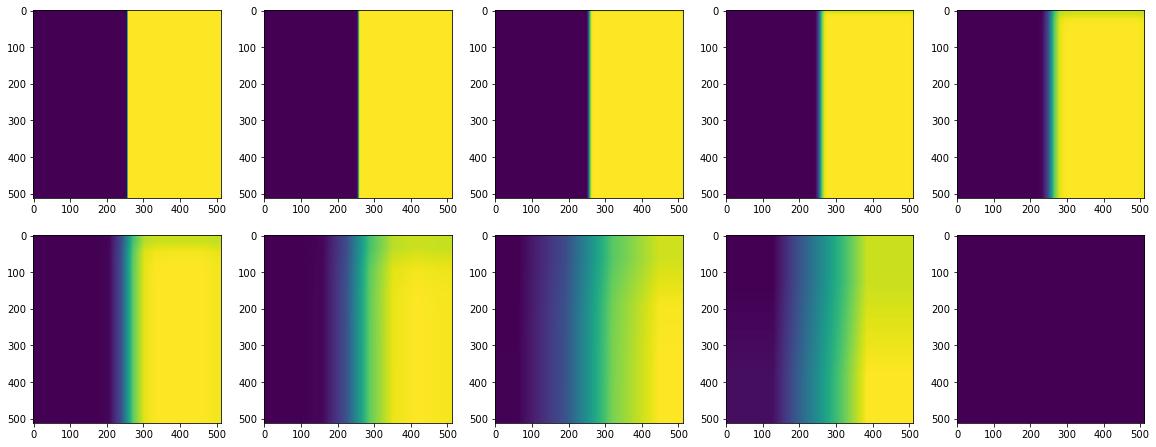

In [144]:
fig = plt.figure(figsize = (20,20))
print("Gaussian Pryramid mask")
fig.add_subplot(5,5,1)
plt.imshow(binary_mask)
fig.add_subplot(5,5,2)
plt.imshow(binary_mask_g1)
fig.add_subplot(5,5,3)
plt.imshow(binary_mask_g2)
fig.add_subplot(5,5,4)
plt.imshow(binary_mask_g3)
fig.add_subplot(5,5,5)
plt.imshow(binary_mask_g4)
fig.add_subplot(5,5,6)
plt.imshow(binary_mask_g5)
fig.add_subplot(5,5,7)
plt.imshow(binary_mask_g6)
fig.add_subplot(5,5,8)
plt.imshow(binary_mask_g7)
fig.add_subplot(5,5,9)
plt.imshow(binary_mask_g8)
fig.add_subplot(5,5,10)
plt.imshow(binary_mask_g9)

In [110]:
binary_mask_g1 = cv.resize(binary_mask_g1, (512,512))
binary_mask_g2 = cv.resize(binary_mask_g2, (512,512))
binary_mask_g3 = cv.resize(binary_mask_g3, (512,512))
binary_mask_g4 = cv.resize(binary_mask_g4, (512,512))
binary_mask_g5 = cv.resize(binary_mask_g5, (512,512))
binary_mask_g6 = cv.resize(binary_mask_g6, (512,512))
binary_mask_g7 = cv.resize(binary_mask_g7, (512,512))
binary_mask_g8 = cv.resize(binary_mask_g8, (512,512))
binary_mask_g9 = cv.resize(binary_mask_g9, (512,512))

In [111]:
def Laplacian_pyramid_linear(output,mask,image1,image2):
    for i in range(512):
        for j in range(512):
            output[i,j] = mask[i,j]*image1[i,j] + (1- mask[i,j]) * image2[i,j]
    return output

In [118]:
image_output = create_blank(512, 512, np.float32, 1)
image_output = Laplacian_pyramid_linear(image_output,binary_mask_g1,barbara_L1,boat_L1)

image_output2 = create_blank(512, 512, np.float32, 1)
image_output2 = Laplacian_pyramid_linear(image_output2,binary_mask_g2,barbara_L2,boat_L2)

image_output3 = create_blank(512, 512, np.float32, 1)
image_output3 = Laplacian_pyramid_linear(image_output3,binary_mask_g3,barbara_L3,boat_L3)

image_output4 = create_blank(512, 512, np.float32, 1)
image_output4 = Laplacian_pyramid_linear(image_output4,binary_mask_g4,barbara_L4,boat_L4)

image_output5 = create_blank(512, 512, np.float32, 1)
image_output5 = Laplacian_pyramid_linear(image_output5,binary_mask_g5,barbara_L5,boat_L5)

image_output6 = create_blank(512, 512, np.float32, 1)
image_output6 = Laplacian_pyramid_linear(image_output6,binary_mask_g6,barbara_L6,boat_L6)

image_output7 = create_blank(512, 512, np.float32, 1)
image_output7 = Laplacian_pyramid_linear(image_output7,binary_mask_g7,barbara_L7,boat_L7)

image_output8 = create_blank(512, 512, np.float32, 1)
image_output8 = Laplacian_pyramid_linear(image_output8,binary_mask_g8,barbara_L8,boat_L8)

image_output9 = create_blank(512, 512, np.float32, 1)
image_output9 = Laplacian_pyramid_linear(image_output9,binary_mask_g9,barbara_L9,boat_L9)

In [151]:
def blend_image(i1,i2,i3,i4,i5,i6,i7,i8,i9):
    blend = create_blank(512, 512, np.float32, 1)
    minVal = 2000
    maxVal = -255
    for i in range(512):
        for j in range(512):
            blend[i,j] = i1[i,j] + i2[i,j] + i3[i,j] + i4[i,j] + i5[i,j] + \
                i6[i,j] + i7[i,j] + i8[i,j] + i9[i,j]
            if blend[i,j] > maxVal:
                maxVal = blend[i,j]
            if blend[i,j] < minVal:
                minVal = blend[i,j]

    for i in range(512):
        for j in range(512):
            blend[i,j] = 255*((blend[i,j]-minVal)/(maxVal-minVal))
    return blend

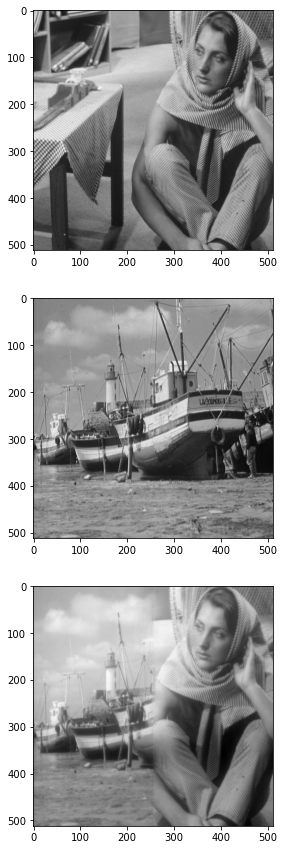

In [152]:
blend1 = blend_image(image_output,image_output2,image_output3,image_output4,image_output5,image_output6,image_output7,image_output8,image_output9)
fig = plt.figure(figsize = (20,15))
fig.add_subplot(3,1,1)
plt.imshow(barbara_g0,cmap = "gray", vmin=0,vmax=255)
fig.add_subplot(3,1,2)
plt.imshow(boat_g0,cmap = "gray", vmin=0,vmax=255)
fig.add_subplot(3,1,3)
plt.imshow(blend1,cmap = "gray", vmin=0,vmax=255)

In [153]:
image_output_2 = create_blank(512, 512, np.float32, 1)
image_output_2 = Laplacian_pyramid_linear(image_output_2,binary_mask_g1,boat_L1,flinstones_L1)

image_output_2_2 = create_blank(512, 512, np.float32, 1)
image_output_2_2 = Laplacian_pyramid_linear(image_output_2_2,binary_mask_g2,boat_L2,flinstones_L2)

image_output_2_3 = create_blank(512, 512, np.float32, 1)
image_output_2_3 = Laplacian_pyramid_linear(image_output_2_3,binary_mask_g3,boat_L3,flinstones_L3)

image_output_2_4 = create_blank(512, 512, np.float32, 1)
image_output_2_4 = Laplacian_pyramid_linear(image_output_2_4,binary_mask_g4,boat_L4,flinstones_L4)

image_output_2_5 = create_blank(512, 512, np.float32, 1)
image_output_2_5 = Laplacian_pyramid_linear(image_output_2_5,binary_mask_g5,boat_L5,flinstones_L5)

image_output_2_6 = create_blank(512, 512, np.float32, 1)
image_output_2_6 = Laplacian_pyramid_linear(image_output_2_6,binary_mask_g6,boat_L6,flinstones_L6)

image_output_2_7 = create_blank(512, 512, np.float32, 1)
image_output_2_7 = Laplacian_pyramid_linear(image_output_2_7,binary_mask_g7,boat_L7,flinstones_L7)

image_output_2_8 = create_blank(512, 512, np.float32, 1)
image_output_2_8 = Laplacian_pyramid_linear(image_output_2_8,binary_mask_g8,boat_L8,flinstones_L8)

image_output_2_9 = create_blank(512, 512, np.float32, 1)
image_output_2_9 = Laplacian_pyramid_linear(image_output_2_9,binary_mask_g9,boat_L9,flinstones_L9)

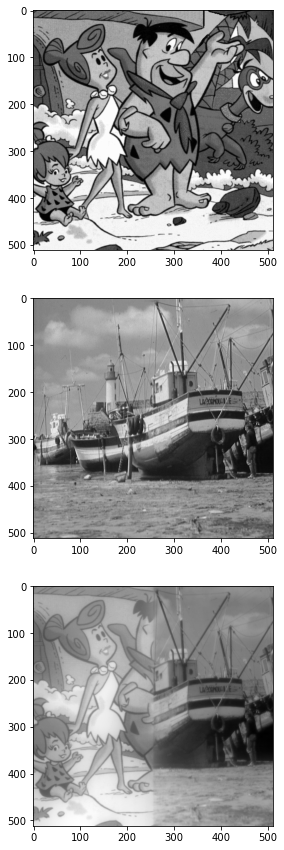

In [154]:
blend2 = blend_image(image_output_2,image_output_2_2,
                     image_output_2_3,image_output_2_4,
                     image_output_2_5,image_output_2_6,
                     image_output_2_7,image_output_2_8,
                     image_output_2_9)

fig = plt.figure(figsize = (20,15))
fig.add_subplot(3,1,1)
plt.imshow(flinstones_g0,cmap = "gray", vmin=0,vmax=255)
fig.add_subplot(3,1,2)
plt.imshow(boat_g0,cmap = "gray", vmin=0,vmax=255)
fig.add_subplot(3,1,3)
plt.imshow(blend2,cmap = "gray", vmin=0,vmax=255)


In [156]:
cv.imwrite("blend1.png",blend1)
cv.imwrite("blend2.png",blend2)


True